### 1. Importing Libraries

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import plot_model 

Using TensorFlow backend.


### 2. Designing Model Architecture

In [2]:
classifier = Sequential()

# Convolutional Layer
classifier.add(Conv2D(32, kernel_size = (3,3), input_shape = (64, 64, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size =(2,2)))

classifier.add(Conv2D(32, kernel_size = (3,3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size =(2,2)))

classifier.add(Conv2D(64, kernel_size = (3,3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size =(2,2)))

classifier.add(Flatten())

# Fully Connected Layer
classifier.add(Dense(256, activation = 'relu'))
classifier.add(Dropout(0.5))
classifier.add(Dense(26, activation = 'softmax'))

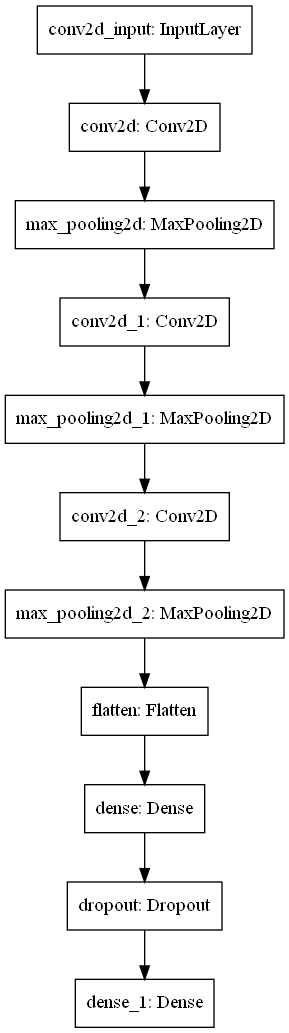

In [3]:
plot_model(
    classifier,
    to_file="model_arch.png"
)

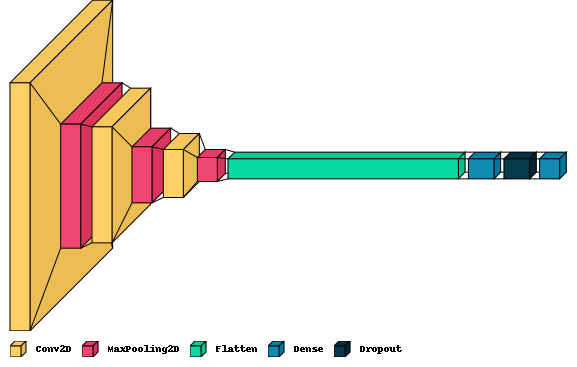

In [4]:
import visualkeras
visualkeras.layered_view(classifier, legend=True)

In [5]:
#Compiling The CNN
classifier.compile(
              optimizer = optimizers.SGD(lr = 0.01),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [6]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2
                        )

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
        'Dataset/training_set',
        target_size=(64, 64),
        batch_size=64,
        class_mode='categorical')

test_set = test_datagen.flow_from_directory(
        'Dataset/test_set',
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical')

Found 45500 images belonging to 26 classes.
Found 6500 images belonging to 26 classes.


In [7]:
model = classifier.fit_generator(
        training_set,
        steps_per_epoch=710,
        epochs=15,
        validation_data = test_set,
        validation_steps = 203
      )

c:\users\susant\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/15
710/710 [==============================] - 500s 703ms/step - loss: 2.2895 - accuracy: 0.3274 - val_loss: 0.2408 - val_accuracy: 0.9353
Epoch 2/15
710/710 [==============================] - 210s 295ms/step - loss: 0.4107 - accuracy: 0.8603 - val_loss: 0.1412 - val_accuracy: 0.9764
Epoch 3/15
710/710 [==============================] - 230s 325ms/step - loss: 0.2199 - accuracy: 0.9270 - val_loss: 0.1057 - val_accuracy: 0.9789
Epoch 4/15
710/710 [==============================] - 231s 326ms/step - loss: 0.1452 - accuracy: 0.9503 - val_loss: 0.1034 - val_accuracy: 0.9888
Epoch 5/15
710/710 [==============================] - 245s 345ms/step - loss: 0.1196 - accuracy: 0.9594 - val_loss: 0.1027 - val_accuracy: 0.9857
Epoch 6/15
710/710 [==============================] - 243s 342ms/step - loss: 0.0967 - accuracy: 0.9659 - val_loss: 0.1256 - val_accuracy: 0.9803
Epoch 7/15
710/710 [==============================] - 221s 311ms/step - loss: 0.0839 - accuracy: 0.9714 - val_loss: 0.1095 -

### 3. Model Performance Visualization

In [8]:
import matplotlib.pyplot as plt
print(model.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


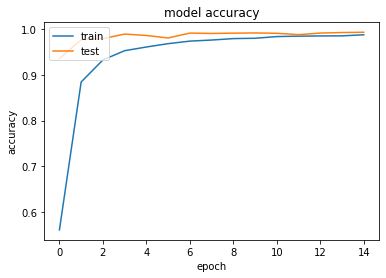

In [9]:
# summarize history for accuracy
plt.plot(model.history['accuracy'])
plt.plot(model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

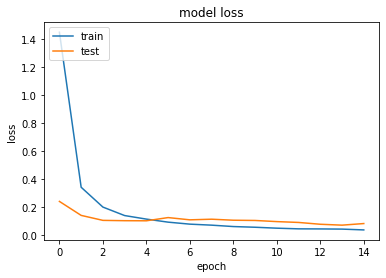

In [10]:
# summarize history for loss
plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### 4. Saving Model

In [11]:
import h5py
classifier.save('English_Alphabet_Detection_Model_V2.h5')